### Flight Price Prediction EDA & Feature Engineering

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the datasets
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Test_set.xlsx")

In [3]:
# let's take a look at our datasets
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
# check the dimensions of the datasets
print("Train Data:", train.shape)
print("Test Data:", test.shape)

Train Data: (10683, 11)
Test Data: (2671, 10)


In [6]:
# check the datatypes
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [8]:
# Descriptive Statistics
train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Concise Summary 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [11]:
# check for null/missing data
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

As you can see that there are 1 missing values in "Route" and "Total_Stops". After carefully observing the data we decided to fill the missing values as follows:

In [13]:
# imputing the missing values
train['Route'] = train['Route'].fillna("DEL → AMD → BOM → COK")
train['Total_Stops'] = train['Total_Stops'].fillna("2 stops")

In [14]:
# Date of Journey
train["Date"] = train['Date_of_Journey'].apply(lambda x:x.split("/")[0])
train["Month"] = train['Date_of_Journey'].apply(lambda x:x.split("/")[1])
train["Year"] = train['Date_of_Journey'].apply(lambda x:x.split("/")[2])

# Drop the column
train = train.drop(['Date_of_Journey'], axis=1)

# change the datatype
train['Date'] = train['Date'].astype('int')
train['Month'] = train['Month'].astype('int')
train['Year'] = train['Year'].astype('int')


In [15]:
# Dep_Time
train['Dep_Hour'] = train['Dep_Time'].apply(lambda x:x.split(":")[0])
train['Dep_Min'] = train['Dep_Time'].apply(lambda x:x.split(":")[1])

# Drop the column
train = train.drop(['Dep_Time'],axis=1)

# change the datatype
train['Dep_Hour'] = train['Dep_Hour'].astype('int')
train['Dep_Min'] = train['Dep_Min'].astype('int')

In [16]:
# Arrival_Time
train['Arrival_Time'] = train['Arrival_Time'].apply(lambda x:x.split(" ")[0])
train['Arrival_Hour'] = train['Arrival_Time'].apply(lambda x:x.split(":")[0])
train['Arrival_Min'] = train['Arrival_Time'].apply(lambda x:x.split(":")[1])

# Drop the Column
train = train.drop(['Arrival_Time'],axis=1)

# change the datatype
train['Arrival_Hour'] = train['Arrival_Hour'].astype('int')
train['Arrival_Min'] = train['Arrival_Min'].astype('int')

In [17]:
# Duration
train['Duration_Hour']=train['Duration'].str.split(' ').str[0].str.split('h').str[0]
train['Duration_Min']=train['Duration'].str.split(' ').str[1].str.split('m').str[0]

# replace incorrect values
train['Duration_Hour'] = train['Duration_Hour'].replace('5m','0')
train['Duration_Min'] = train['Duration_Min'].fillna('0')

# drop the column
train = train.drop(['Duration'],axis=1)

# change the datatype
train['Duration_Hour'] = train['Duration_Hour'].astype('int')
train['Duration_Min'] = train['Duration_Min'].astype('int')

Now for our analysis we will convert "Duration_Hour" into minutes and then add it to "Duration_Min" to get total minutes and then we will convert it into Duration in hour for ease of analysis.

In [18]:
# convert it into minutes
train['Duration_Hour'] = train['Duration_Hour']*60

# add columns to get total minutes
train['Total_Travel_Time_Hour'] = train['Duration_Hour'] + train['Duration_Min']

# convert it into hours
train['Total_Travel_Time_Hour'] = round(train['Total_Travel_Time_Hour']/60,3)

# drop the unnecessary columns
train = train.drop(['Duration_Hour', 'Duration_Min'], axis=1)

In [19]:
# Destination
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

here we will replace "New Delhi" with "Delhi"

In [20]:
# replacing the values
train['Destination'] = train['Destination'].replace('New Delhi', 'Delhi')

In [21]:
# Year
train['Year'].value_counts()

2019    10683
Name: Year, dtype: int64

Since there is only single type of record for Year column i.e., Year column has only value --> "2019" so it is not of much use for further analysis. We will drop the "Year" column.

In [22]:
# drop column "Year"
train = train.drop(['Year'], axis=1)

In [23]:
# check datatypes
train.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Total_Stops                object
Additional_Info            object
Price                       int64
Date                        int32
Month                       int32
Dep_Hour                    int32
Dep_Min                     int32
Arrival_Hour                int32
Arrival_Min                 int32
Total_Travel_Time_Hour    float64
dtype: object

In [24]:
# check for missing values
train.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     0
Total_Stops               0
Additional_Info           0
Price                     0
Date                      0
Month                     0
Dep_Hour                  0
Dep_Min                   0
Arrival_Hour              0
Arrival_Min               0
Total_Travel_Time_Hour    0
dtype: int64

In [25]:
# check for duplicated records
train.duplicated().sum()

222

In [26]:
# drop duplicated records
train = train.drop_duplicates()

In [27]:
# check for duplicated records
train.duplicated().sum()

0

In [28]:
# check train data
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2.833
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7.417
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19.000
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5.417
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4.750


#### Now we will perform the same steps on test data

In [29]:
# Date of Journey
test["Date"] = test['Date_of_Journey'].apply(lambda x:x.split("/")[0])
test["Month"] = test['Date_of_Journey'].apply(lambda x:x.split("/")[1])
test["Year"] = test['Date_of_Journey'].apply(lambda x:x.split("/")[2])

# Drop the column
test = test.drop(['Date_of_Journey'], axis=1)

# change the datatype
test['Date'] = test['Date'].astype('int')
test['Month'] = test['Month'].astype('int')
test['Year'] = test['Year'].astype('int')

In [30]:
# Dep_Time
test['Dep_Hour'] = test['Dep_Time'].apply(lambda x:x.split(":")[0])
test['Dep_Min'] = test['Dep_Time'].apply(lambda x:x.split(":")[1])

# Drop the column
test = test.drop(['Dep_Time'],axis=1)

# change the datatype
test['Dep_Hour'] = test['Dep_Hour'].astype('int')
test['Dep_Min'] = test['Dep_Min'].astype('int')

In [31]:
# Arrival_Time
test['Arrival_Time'] = test['Arrival_Time'].apply(lambda x:x.split(" ")[0])
test['Arrival_Hour'] = test['Arrival_Time'].apply(lambda x:x.split(":")[0])
test['Arrival_Min'] = test['Arrival_Time'].apply(lambda x:x.split(":")[1])

# Drop the Column
test = test.drop(['Arrival_Time'],axis=1)

# change the datatype
test['Arrival_Hour'] = test['Arrival_Hour'].astype('int')
test['Arrival_Min'] = test['Arrival_Min'].astype('int')

In [32]:
# Duration
test['Duration_Hour']=test['Duration'].str.split(' ').str[0].str.split('h').str[0]
test['Duration_Min']=test['Duration'].str.split(' ').str[1].str.split('m').str[0]

# replace incorrect values
test['Duration_Hour'] = test['Duration_Hour'].replace('5m','0')
test['Duration_Min'] = test['Duration_Min'].fillna('0')

# drop the column
test = test.drop(['Duration'],axis=1)

# change the datatype
test['Duration_Hour'] = test['Duration_Hour'].astype('int')
test['Duration_Min'] = test['Duration_Min'].astype('int')

In [33]:
# convert it into minutes
test['Duration_Hour'] = test['Duration_Hour']*60

# add columns to get total minutes
test['Total_Travel_Time_Hour'] = test['Duration_Hour'] + test['Duration_Min']

# convert it into hours
test['Total_Travel_Time_Hour'] = round(test['Total_Travel_Time_Hour']/60,3)

# drop the unnecessary columns
test = test.drop(['Duration_Hour', 'Duration_Min'], axis=1)

In [34]:
# Destination
test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [35]:
# replacing the values
test['Destination'] = test['Destination'].replace('New Delhi', 'Delhi')

In [36]:
# Year
test['Year'].value_counts()

2019    2671
Name: Year, dtype: int64

Since there is only single value in "Year" column i.e., the only record present in this column is 2019. Let's drop this column.

In [37]:
# drop column "Year"
test = test.drop(['Year'],axis=1)

In [38]:
# check datatypes
test.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Total_Stops                object
Additional_Info            object
Date                        int32
Month                       int32
Dep_Hour                    int32
Dep_Min                     int32
Arrival_Hour                int32
Arrival_Min                 int32
Total_Travel_Time_Hour    float64
dtype: object

In [39]:
# check for missing values
test.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     0
Total_Stops               0
Additional_Info           0
Date                      0
Month                     0
Dep_Hour                  0
Dep_Min                   0
Arrival_Hour              0
Arrival_Min               0
Total_Travel_Time_Hour    0
dtype: int64

In [40]:
# check for duplicates
test.duplicated().sum()

26

In [41]:
# drop duplicates
test = test.drop_duplicates()

In [42]:
# check for duplicates
test.duplicated().sum()

0

In [43]:
# check test data
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10.917
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4.000
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23.750
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13.000
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2.833


In [44]:
test['Airline'].value_counts()

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Now that we are done with data cleaning let's move towards a detailed EDA to gain insights from data.

In [45]:
# Airline
train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Since "Trujet" has only one record we will drop that records

In [46]:
train = train[train['Airline']!="Trujet"]

For our analysis we will replace "Multiple carriers Premium economy", "Jet Airways Business", "Vistara Premium economy" with their original names.

In [47]:
# replacing airline names with their original (For train data)
train['Airline'] = train['Airline'].replace(['Multiple carriers Premium economy', 'Jet Airways Business','Vistara Premium economy'],
                                            ['Multiple carriers', 'Jet Airways','Vistara'])

In [48]:
# replacing airline names with their original (For test data)
test['Airline'] = test['Airline'].replace(['Multiple carriers Premium economy', 'Jet Airways Business','Vistara Premium economy'],
                                            ['Multiple carriers', 'Jet Airways','Vistara'])

In [49]:
train['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1695
Multiple carriers    1209
SpiceJet              815
Vistara               480
Air Asia              318
GoAir                 194
Name: Airline, dtype: int64

As you can see that "Jet Airways" has maximum number of records in data.

In [50]:
# Airlines and their average prices.
airline_avg_price = train.groupby(['Airline'])['Price'].mean().round(2).sort_values(ascending=False).reset_index()
airline_avg_price

,Airline,Price
0,Jet Airways,11674.72
1,Multiple carriers,10908.23
2,Air India,9555.38
3,Vistara,7809.01
4,GoAir,5861.06
5,IndiGo,5668.47
6,Air Asia,5593.75
7,SpiceJet,4335.84


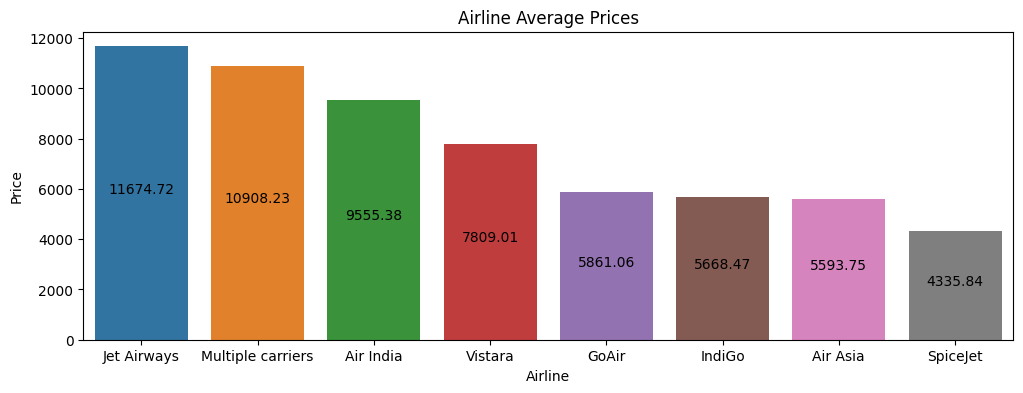

In [51]:
# let's visualize above data
# function to add value labels
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center')
if __name__=='__main__':
    x = airline_avg_price['Airline'].values
    y = airline_avg_price['Price'].values
    plt.figure(figsize=(12,4))
    sns.barplot(x='Airline',y='Price', data=airline_avg_price, ci=None, dodge=False, estimator=np.mean)
    add_labels(x,y)
    plt.title("Airline Average Prices")
    plt.show()

#### From above barchart we can see that for "Jet Airways", "Multiple Carriers", "Air India", "Vistara" airlines the flight ticket prices are expensive and for "Spicejet" the flight ticket prices are comparatively cheaper.

In [52]:
# Source to Destination Average Prices
source_avg_price = train.groupby(['Source', 'Destination'])['Price'].mean().round(2).sort_values(ascending=False).reset_index()
source_avg_price

,Source,Destination,Price
0,Delhi,Cochin,10460.91
1,Kolkata,Banglore,9143.08
2,Banglore,Delhi,8024.69
3,Mumbai,Hyderabad,5061.03
4,Chennai,Kolkata,4789.89


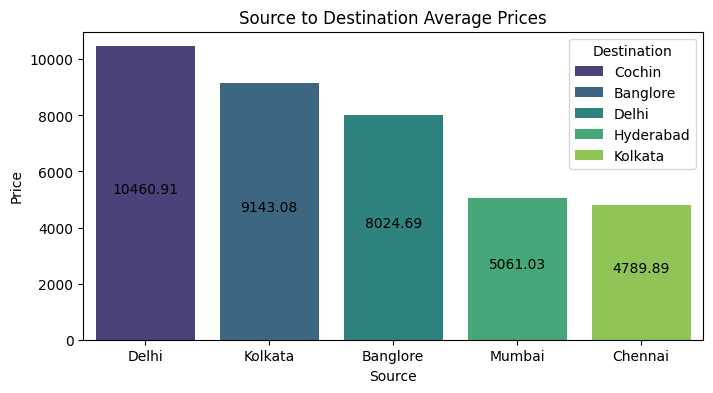

In [53]:
# let's visualize above data
# function to add value labels
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center')
if __name__=='__main__':
    x = source_avg_price['Source'].values
    y = source_avg_price['Price'].values
    plt.figure(figsize=(8,4))
    sns.barplot(x='Source',y='Price', hue='Destination', data=source_avg_price, ci=None, dodge=False, estimator=np.mean, palette='viridis')
    add_labels(x,y)
    plt.title("Source to Destination Average Prices")
    plt.show()

#### From above barchart we can see that for "Delhi --> Cochin", "Kolkata --> Bangalore", "Bangalore --> Delhi" the flight ticket prices are  expensive and for "Mumbai --> Hyderabad", "Chennai --> Kolkata" the flight tickets are cheaper.

In [54]:
# Source to Destination Average Travel Time
source_travel_time = train.groupby(['Source', 'Destination'])['Total_Travel_Time_Hour'].mean().round(2).sort_values(
    ascending=False).reset_index()
source_travel_time

,Source,Destination,Total_Travel_Time_Hour
0,Delhi,Cochin,13.23
1,Kolkata,Banglore,12.43
2,Banglore,Delhi,6.28
3,Mumbai,Hyderabad,3.20
4,Chennai,Kolkata,2.33


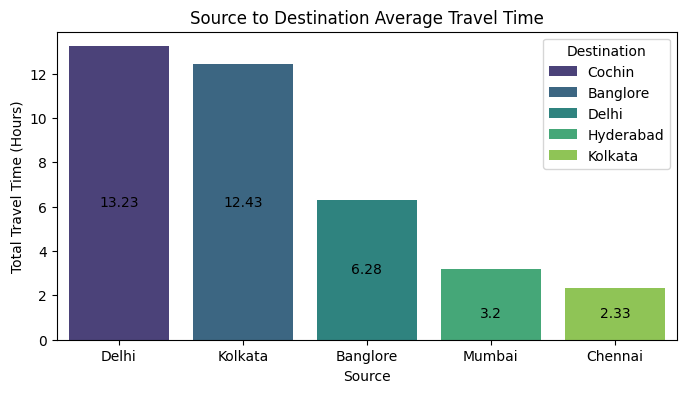

In [55]:
# let's visualize above data
# function to add value labels
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center')
if __name__=='__main__':
    x = source_travel_time['Source'].values
    y = source_travel_time['Total_Travel_Time_Hour'].values
    plt.figure(figsize=(8,4))
    sns.barplot(x='Source',y='Total_Travel_Time_Hour', hue='Destination', data=source_travel_time, ci=None, dodge=False, 
                estimator=np.mean, palette='viridis')
    add_labels(x,y)
    plt.ylabel("Total Travel Time (Hours)")
    plt.title("Source to Destination Average Travel Time")
    plt.show()

#### The average travel time for "Delhi --> Cochin" and "Kolkata --> Bangalore" is higher compared to "Mumbai --> Hyderabad" and "Chennai --> Kolkata".

In [56]:
# Airlines with Less Travel Time(<4 Hours)
fast_travel_time_price = train.groupby(['Airline','Source','Destination'])['Total_Travel_Time_Hour','Price'].mean().round(2).sort_values(
    ascending=True,by='Total_Travel_Time_Hour').reset_index().head(16)
fast_travel_time_price

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13364\744487864.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fast_travel_time_price = train.groupby(['Airline','Source','Destination'])['Total_Travel_Time_Hour','Price'].mean().round(2).sort_values(


,Airline,Source,Destination,Total_Travel_Time_Hour,Price
0,IndiGo,Mumbai,Hyderabad,1.52,3659.82
1,SpiceJet,Mumbai,Hyderabad,1.53,2511.11
2,Air India,Chennai,Kolkata,2.25,5895.64
3,Vistara,Chennai,Kolkata,2.28,7528.50
4,SpiceJet,Chennai,Kolkata,2.31,3993.52
5,IndiGo,Chennai,Kolkata,2.36,4538.77
6,Jet Airways,Mumbai,Hyderabad,2.44,6227.95
7,Air Asia,Banglore,Delhi,2.80,4575.33
8,GoAir,Banglore,Delhi,2.92,4948.88
9,IndiGo,Banglore,Delhi,3.01,5245.56


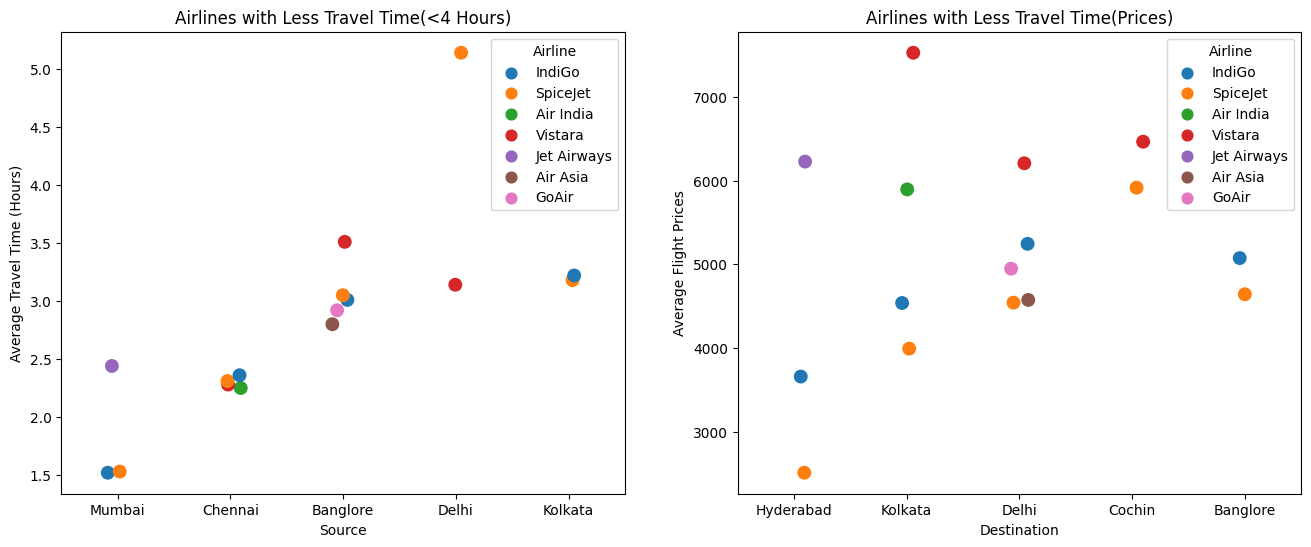

In [57]:
# let's visualize above data
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.stripplot(x='Source', y='Total_Travel_Time_Hour', hue='Airline', data=fast_travel_time_price, size=10, ax=ax1)
plt.ylabel("Average Travel Time (Hours)")
plt.title("Airlines with Less Travel Time(<4 Hours)")

ax2 = fig.add_subplot(122)
sns.stripplot(x='Destination', y='Price', hue='Airline', data=fast_travel_time_price, size=10, ax=ax2)
plt.ylabel("Average Flight Prices")
plt.title("Airlines with Less Travel Time(Prices)")

plt.show()

#### The above 2 barcharts gives information about which airlines take less travel time from Source --> Destination as well as which airlines have cheaper flight ticket prices.

In [58]:
# Airlines Flight Prices compared with Month
airline_monthly_price = train.groupby(['Airline','Month'])['Price'].mean().round(2).sort_values(ascending=True).reset_index()
airline_monthly_price

,Airline,Month,Price
0,SpiceJet,6,3942.29
1,SpiceJet,5,4060.43
2,SpiceJet,4,4248.40
3,Air Asia,4,4729.36
4,IndiGo,4,4779.93
5,GoAir,4,4953.43
6,GoAir,6,5058.53
7,IndiGo,6,5112.08
8,Air Asia,5,5174.35
9,IndiGo,5,5229.69


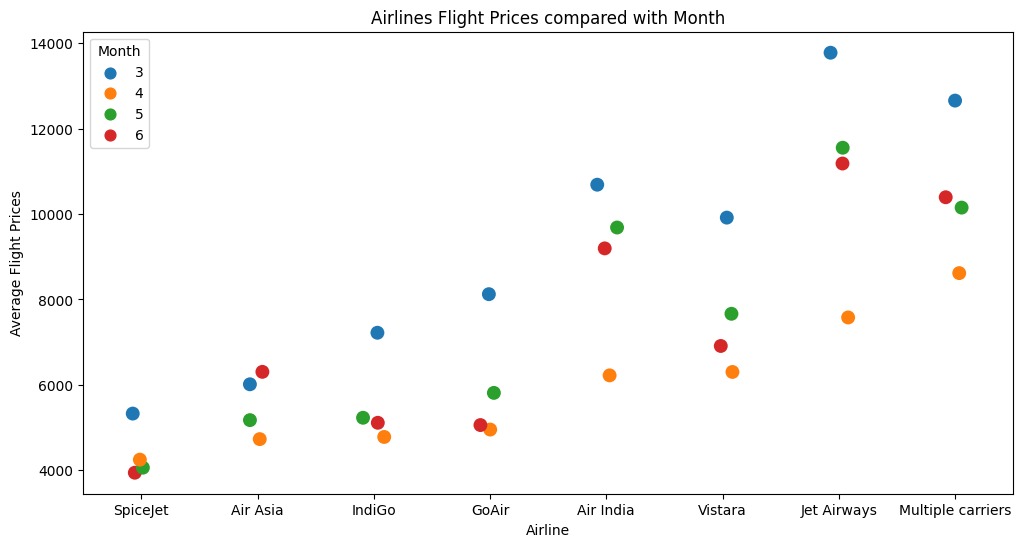

In [59]:
# Let's visualize above data
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(111)
sns.stripplot(x='Airline', y='Price', hue='Month', data=airline_monthly_price, ax=ax1, size=10)
plt.ylabel("Average Flight Prices")
plt.title("Airlines Flight Prices compared with Month")
plt.show()

#### The above stripplot gives information on the months where flight ticket prices are cheaper for the airlines. i.e., if you carefully observe you can see that "March" month records expensive flight ticket prices for most of the airlines while "April" month records cheaper flight ticket prices.

In [60]:
# Airlines Flight Prices compared with Date
airline_daily_price = train.groupby(['Airline','Date'])['Price'].mean().round(2).sort_values(ascending=True).reset_index()
airline_daily_price

,Airline,Date,Price
0,SpiceJet,27,3757.22
1,SpiceJet,18,3914.27
2,SpiceJet,21,4089.90
3,SpiceJet,15,4275.46
4,SpiceJet,24,4376.05
...,...,...,...
75,Multiple carriers,1,12003.44
76,Multiple carriers,6,12538.58
77,Jet Airways,6,12880.42
78,Multiple carriers,3,13208.57


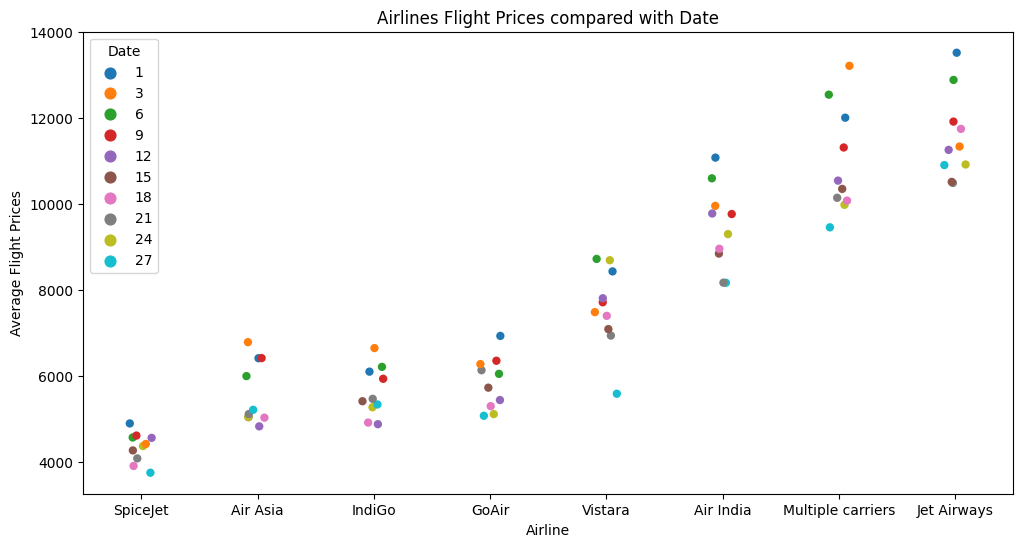

In [61]:
# Let's visualize above data
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(111)
sns.stripplot(x='Airline', y='Price', hue='Date', data=airline_daily_price, ax=ax1, size=6)
plt.ylabel("Average Flight Prices")
plt.title("Airlines Flight Prices compared with Date")
plt.show()

#### Above stripplot gives details on cheaper and expensive flight ticket prices for airlines w.r.t. Date of the month. i.e., for "Vistara" the flight ticket prices are cheaper on 27th day of the month and expensive on 6th and 24th day of the month.

In [62]:
# Total_Stops
train['Total_Stops'].value_counts()

1 stop      5624
non-stop    3473
2 stops     1319
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

Since there is only one record for "4 stops" we will drop it.

In [63]:
train = train[train['Total_Stops']!="4 stops"]

In [64]:
test['Total_Stops'].value_counts()

1 stop      1427
non-stop     846
2 stops      360
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

Since there is only one record for "4 stops" we will drop it.

In [65]:
test = test[test['Total_Stops']!="4 stops"]

In [66]:
# Total_Stops
total_stops_avg_price = train.groupby(['Airline', 'Total_Stops'])['Price'].mean().round(2).sort_values(ascending=True).reset_index()
total_stops_avg_price

,Airline,Total_Stops,Price
0,SpiceJet,non-stop,3800.04
1,Air Asia,non-stop,4492.39
2,IndiGo,non-stop,4714.87
3,GoAir,non-stop,4726.17
4,Air India,non-stop,5600.55
5,Jet Airways,non-stop,6173.38
6,Vistara,non-stop,6322.57
7,Air Asia,2 stops,6341.89
8,SpiceJet,1 stop,6750.56
9,GoAir,1 stop,6884.68


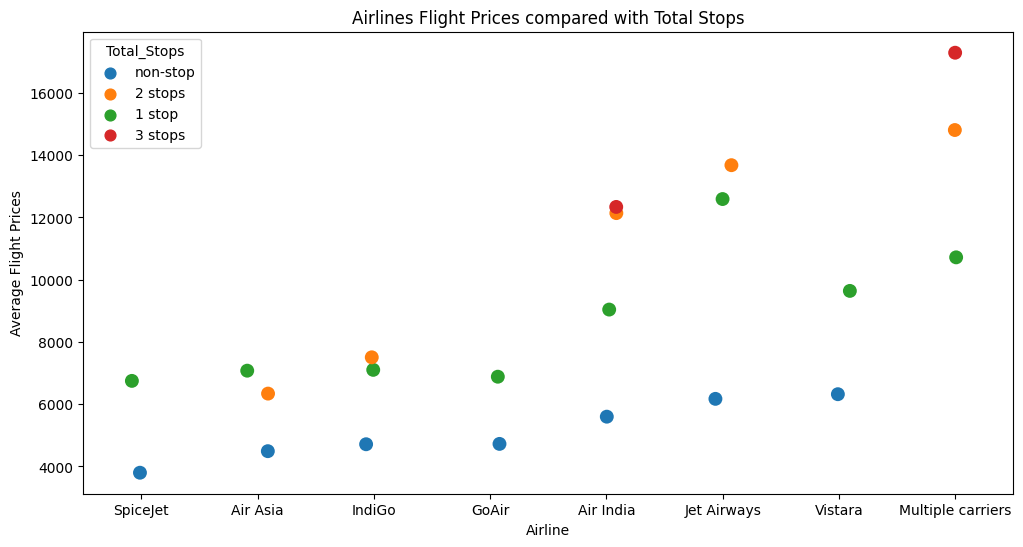

In [67]:
# Let's visualize above data
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(111)
sns.stripplot(x='Airline', y='Price', hue='Total_Stops', data=total_stops_avg_price, ax=ax1, size=10)
plt.ylabel("Average Flight Prices")
plt.title("Airlines Flight Prices compared with Total Stops")
plt.show()

#### From above stripplot we observed that flight ticket prices are cheaper for "non-stop" travel and it increases with the no of stops.

### Feature Engineering

In [68]:
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2.833
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7.417


In [69]:
# Converting categorical data into numerical using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
# Airline
train['Airline'] = le.fit_transform(train['Airline'])

# Source
train['Source'] = le.fit_transform(train['Source'])

# Destination
train['Destination'] = le.fit_transform(train['Destination'])

# Route
train['Route'] = le.fit_transform(train['Route'])

# Total_Stops
train['Total_Stops'] = train['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3})

# Additional_Info
train['Additional_Info'] = le.fit_transform(train['Additional_Info'])

In [71]:
# check datatypes
train.dtypes

Airline                     int32
Source                      int32
Destination                 int32
Route                       int32
Total_Stops                 int64
Additional_Info             int32
Price                       int64
Date                        int32
Month                       int32
Dep_Hour                    int32
Dep_Min                     int32
Arrival_Hour                int32
Arrival_Min                 int32
Total_Travel_Time_Hour    float64
dtype: object

In [72]:
# check for null/missing values
train.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     0
Total_Stops               0
Additional_Info           0
Price                     0
Date                      0
Month                     0
Dep_Hour                  0
Dep_Min                   0
Arrival_Hour              0
Arrival_Min               0
Total_Travel_Time_Hour    0
dtype: int64

In [73]:
# check for duplicate records
train.duplicated().sum()

0

In [74]:
# check train data
train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
0,3,0,2,17,0,8,3897,24,3,22,20,1,10,2.833
1,1,3,0,82,2,8,7662,1,5,5,50,13,15,7.417


In [75]:
test.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10.917
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4.000


In [76]:
# Airline
test['Airline'] = le.fit_transform(test['Airline'])

# Source
test['Source'] = le.fit_transform(test['Source'])

# Destination
test['Destination'] = le.fit_transform(test['Destination'])

# Route
test['Route'] = le.fit_transform(test['Route'])

# Total_Stops
test['Total_Stops'] = test['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3})

# Additional_Info
test['Additional_Info'] = le.fit_transform(test['Additional_Info'])

In [77]:
# check datatypes
test.dtypes

Airline                     int32
Source                      int32
Destination                 int32
Route                       int32
Total_Stops                 int64
Additional_Info             int32
Date                        int32
Month                       int32
Dep_Hour                    int32
Dep_Min                     int32
Arrival_Hour                int32
Arrival_Min                 int32
Total_Travel_Time_Hour    float64
dtype: object

In [78]:
# check for null/missing values
test.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     0
Total_Stops               0
Additional_Info           0
Date                      0
Month                     0
Dep_Hour                  0
Dep_Min                   0
Arrival_Hour              0
Arrival_Min               0
Total_Travel_Time_Hour    0
dtype: int64

In [79]:
# check for duplicates
test.duplicated().sum()

1

In [80]:
# drop duplicates
test = test.drop_duplicates()

In [81]:
# check for duplicates
test.duplicated().sum()

0

In [82]:
# check the test data
test.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
0,4,2,1,75,1,5,6,6,17,30,4,25,10.917
1,3,3,0,64,1,5,12,5,6,20,10,20,4.000


In [83]:
# save the datasets
train.to_csv("final_train.csv")
test.to_csv("final_test.csv")

In [84]:
# check for correlatin
train.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
Airline,1.000000,-0.005676,0.051238,0.033920,-0.166976,-0.158482,0.032589,0.026456,0.037944,-0.021075,-0.065750,-0.016221,-0.099816,-0.124903
Source,-0.005676,1.000000,-0.432859,0.400387,0.194860,-0.021972,0.014072,0.005356,0.180793,0.060571,-0.056373,0.027591,0.021081,0.163152
Destination,0.051238,-0.432859,1.000000,-0.223223,-0.423495,0.071717,-0.260743,0.003851,-0.149400,-0.089285,0.097001,-0.061377,0.007485,-0.383874
Route,0.033920,0.400387,-0.223223,1.000000,0.442930,0.042612,0.155373,0.079446,0.234397,-0.076288,-0.069948,0.020633,-0.175486,0.273140
Total_Stops,-0.166976,0.194860,-0.423495,0.442930,1.000000,-0.077917,0.601796,-0.018407,0.039486,-0.066737,-0.003195,0.051168,-0.107329,0.727998
Additional_Info,-0.158482,-0.021972,0.071717,0.042612,-0.077917,1.000000,-0.068227,-0.016849,-0.049397,-0.059991,-0.015423,0.021339,0.044380,-0.169236
Price,0.032589,0.014072,-0.260743,0.155373,0.601796,-0.068227,1.000000,-0.158843,-0.113547,0.005637,-0.024567,0.030949,-0.086293,0.501354
Date,0.026456,0.005356,0.003851,0.079446,-0.018407,-0.016849,-0.158843,1.000000,-0.038705,-0.003564,-0.004825,-0.002446,-0.015192,-0.029707
Month,0.037944,0.180793,-0.149400,0.234397,0.039486,-0.049397,-0.113547,-0.038705,1.000000,0.040716,-0.062698,0.000907,-0.099682,0.004857
Dep_Hour,-0.021075,0.060571,-0.089285,-0.076288,-0.066737,-0.059991,0.005637,-0.003564,0.040716,1.000000,-0.014856,-0.003269,0.073313,-0.000796


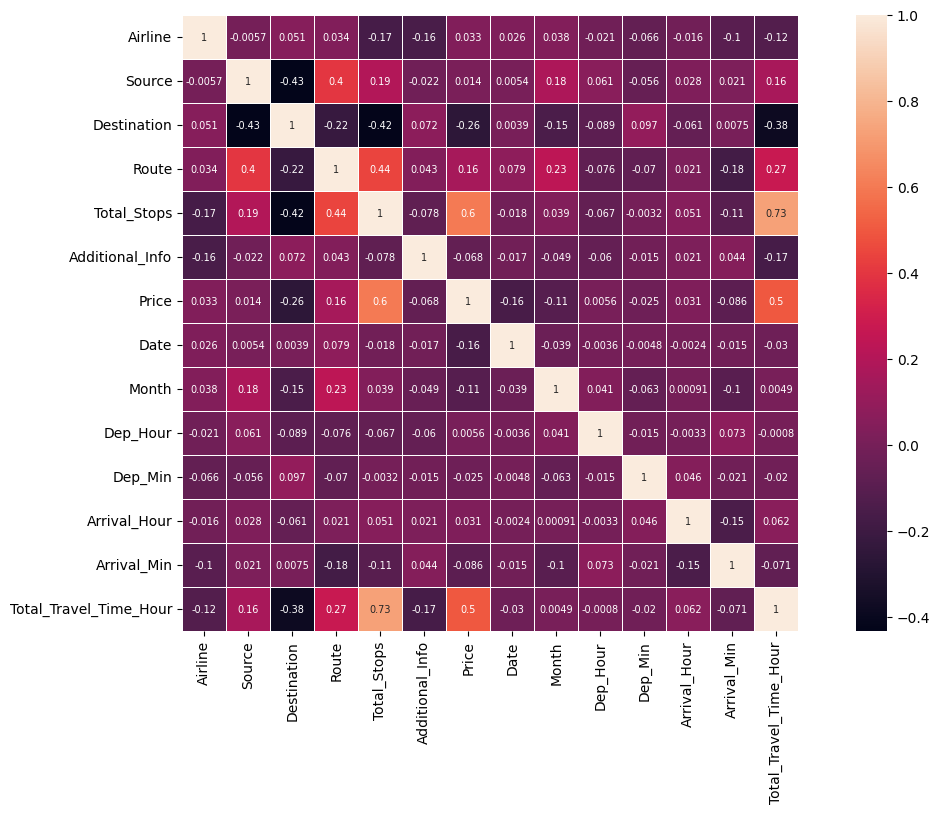

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), square=True, annot=True, annot_kws = {"size": 7}, linewidths=0.5)
plt.show()

In [86]:
# creating dependent and independent features
X = train.drop(['Price'], axis=1)
y = train['Price']

In [87]:
# split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [88]:
# check the shapes
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train : (7321, 13)
y_train : (7321,)
X_test : (3138, 13)
y_test : (3138,)


In [89]:
# Now we will scale the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [90]:
# scaling training data
X_train_scaled = ss.fit_transform(X_train)

In [91]:
# scaling test data
X_test_scaled = ss.transform(X_test)
test_scaled = ss.transform(test)

In [92]:
X_train_scaled

array([[-0.93233429, -1.64803023,  0.8089755 , ...,  0.08231344,
         0.32075329, -0.92705934],
       [ 1.42885894, -0.80595671,  2.77495379, ..., -0.21085937,
        -1.4791201 , -0.99698469],
       [-2.1129309 ,  0.87819031, -1.1570028 , ..., -0.21085937,
         1.82064778, -0.95704448],
       ...,
       [ 0.83856063,  0.0361168 , -0.17401365, ...,  0.81524548,
        -1.4791201 ,  0.05249538],
       [-0.34203598,  0.0361168 , -0.17401365, ..., -0.797205  ,
         1.52066888, -0.87704411],
       [ 0.24826233,  0.87819031, -1.1570028 , ..., -1.38355063,
         0.92071109,  1.16194573]])

In [93]:
X_test_scaled

array([[ 0.24826233,  0.0361168 , -0.17401365, ...,  0.81524548,
        -1.4791201 , -0.0674452 ],
       [ 0.24826233, -1.64803023,  0.8089755 , ..., -0.50403219,
         0.02077439,  0.12242073],
       [ 0.24826233,  1.72026382,  1.79196464, ..., -0.797205  ,
         0.62073219, -1.0968952 ],
       ...,
       [-1.52263259,  0.0361168 , -0.17401365, ...,  1.40159111,
        -1.4791201 ,  0.32236168],
       [ 0.24826233,  0.0361168 , -0.17401365, ..., -1.38355063,
         0.02077439,  0.98203487],
       [-1.52263259,  0.0361168 , -0.17401365, ..., -0.94379141,
         0.92071109,  0.25243632]])

In [94]:
test_scaled

array([[ 0.24826233,  0.0361168 , -0.17401365, ..., -1.38355063,
         0.02077439,  0.04254031],
       [-0.34203598,  0.87819031, -1.1570028 , ..., -0.50403219,
        -0.27920451, -0.78708868],
       [ 0.24826233,  0.0361168 , -0.17401365, ...,  0.81524548,
        -1.4791201 ,  1.58173776],
       ...,
       [ 0.24826233,  0.0361168 , -0.17401365, ..., -1.38355063,
         0.02077439, -0.47728216],
       [-1.52263259,  0.0361168 , -0.17401365, ...,  0.81524548,
        -0.57918341,  0.56224284],
       [ 0.83856063,  0.0361168 , -0.17401365, ...,  0.81524548,
        -0.57918341,  0.45225733]])

### Model Training

#### RandomForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [96]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [97]:
rf.score(X_train_scaled, y_train)

0.9791664379048196

In [98]:
rf_pred = rf.predict(X_test_scaled)

In [99]:
# check model performance metrics
from sklearn.metrics import r2_score, mean_squared_error

In [100]:
# r2 score
print("R2 Score:", r2_score(y_test, rf_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))

R2 Score: 0.9147657566274524
RMSE: 1325.8788264419388


In [101]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [102]:
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [103]:
xgb.score(X_train_scaled, y_train)

0.9771722349358681

In [104]:
xgb_pred = xgb.predict(X_test_scaled)

In [105]:
# r2 score
print("R2 Score:", r2_score(y_test, xgb_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))

R2 Score: 0.9167322529255304
RMSE: 1310.494453761201


#### Let's try Deep Learning models